In [1]:
import numpy as np
import pandas as pd

**Load Dataset**

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Corrected data type for Total charges column

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Now making all features numerical from object type

In [5]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [6]:
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [7]:
df['PhoneService'].value_counts() 

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [8]:
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
df['MultipleLines'] = df['MultipleLines'].map({'No phone service': 0, 'No': 1,'Yes': 2})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No internet service': 0, 'No': 1,'Yes': 2})
df['OnlineBackup'] = df['OnlineBackup'].map({'No internet service': 0, 'No': 1,'Yes': 2})
df['DeviceProtection'] = df['DeviceProtection'].map({'No internet service': 0, 'No': 1,'Yes': 2})
df['TechSupport'] = df['TechSupport'].map({'No internet service': 0, 'No': 1,'Yes': 2})
df['StreamingTV'] = df['StreamingTV'].map({'No internet service': 0, 'No': 1,'Yes': 2})
df['StreamingMovies'] = df['StreamingMovies'].map({'No internet service': 0, 'No': 1,'Yes': 2})
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1,'Two year': 2})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,1,...,1,1,1,1,0,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,1,DSL,2,...,2,1,1,1,1,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,1,DSL,2,...,1,1,1,1,0,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,2,...,2,2,1,1,1,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,1,Fiber optic,1,...,1,1,1,1,0,1,Electronic check,70.70,151.65,1


In [9]:
df = pd.get_dummies(df, columns=['InternetService'], drop_first=True, dtype=int)
df = pd.get_dummies(df, columns=['PaymentMethod'], drop_first=True, dtype=int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   MultipleLines                          7043 non-null   int64  
 8   OnlineSecurity                         7043 non-null   int64  
 9   OnlineBackup                           7043 non-null   int64  
 10  DeviceProtection                       7043 non-null   int64  
 11  Tech

CustomerID and TotalCharges columns are of no use as totalcharges column has 11 missing values and we already have monthly charges column as well as tenure for every customer which is of more importance than this column.

In [10]:
df.drop(['customerID'], axis=1, inplace=True)
df.drop(['TotalCharges'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,Churn,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,2,1,...,1,0,1,29.85,0,0,0,0,1,0
1,1,0,0,0,34,1,1,2,1,2,...,1,1,0,56.95,0,0,0,0,0,1
2,1,0,0,0,2,1,1,2,2,1,...,1,0,1,53.85,1,0,0,0,0,1
3,1,0,0,0,45,0,0,2,1,2,...,1,1,0,42.30,0,0,0,0,0,0
4,0,0,0,0,2,1,1,1,1,1,...,1,0,1,70.70,1,1,0,0,1,0


In [11]:
df.corr()['Churn']

gender                                  -0.008612
SeniorCitizen                            0.150889
Partner                                 -0.150448
Dependents                              -0.164221
tenure                                  -0.352229
PhoneService                             0.011942
MultipleLines                            0.036310
OnlineSecurity                           0.023309
OnlineBackup                             0.074205
DeviceProtection                         0.084654
TechSupport                              0.027037
StreamingTV                              0.164673
StreamingMovies                          0.163220
Contract                                -0.396713
PaperlessBilling                         0.191825
MonthlyCharges                           0.193356
Churn                                    1.000000
InternetService_Fiber optic              0.308020
InternetService_No                      -0.227890
PaymentMethod_Credit card (automatic)   -0.134302


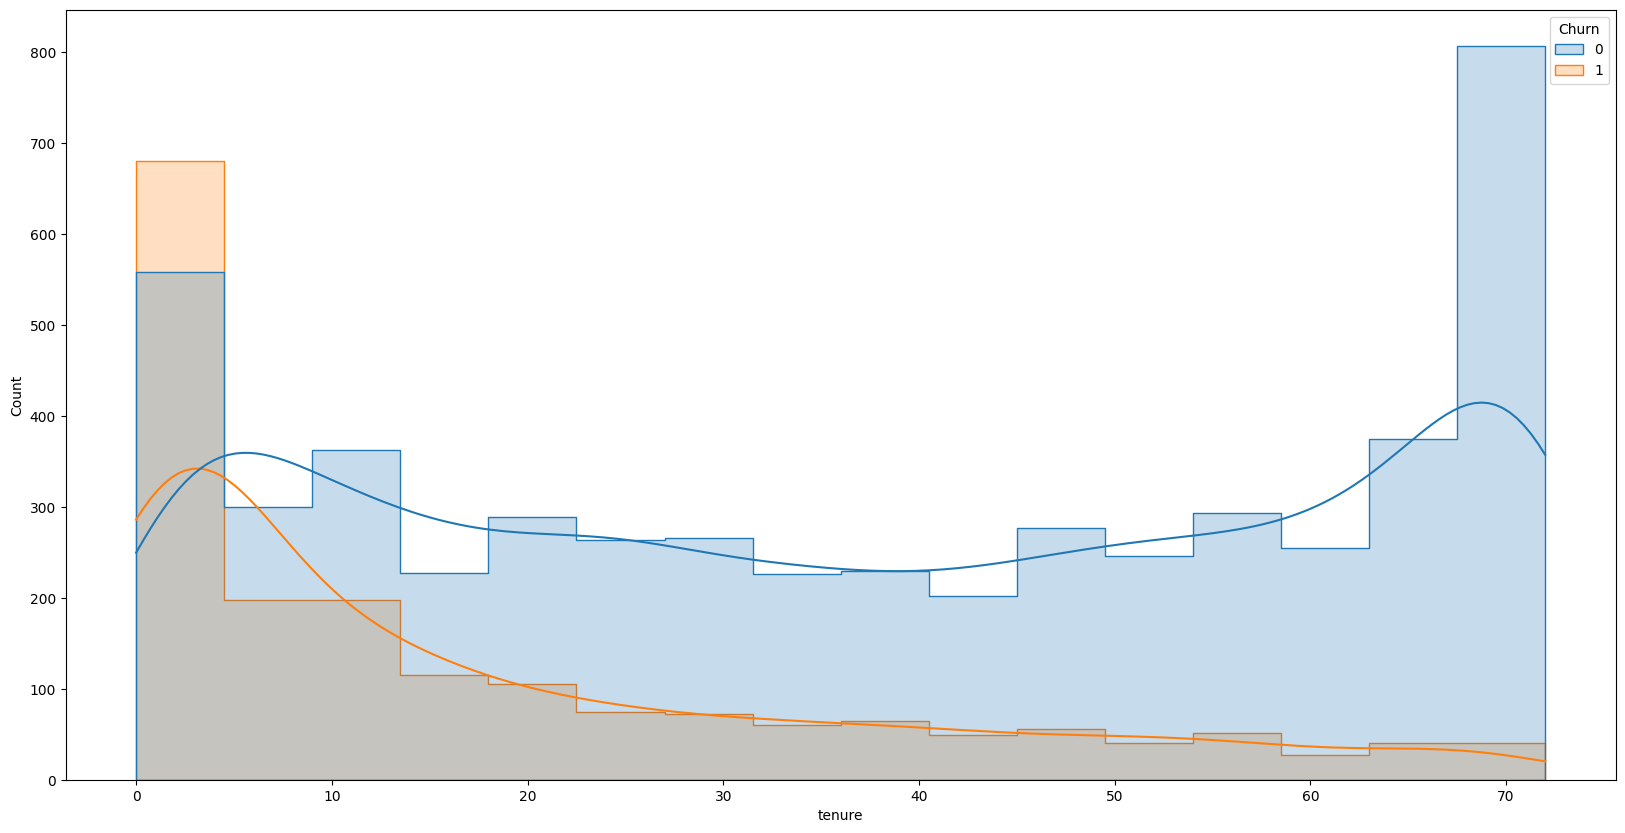

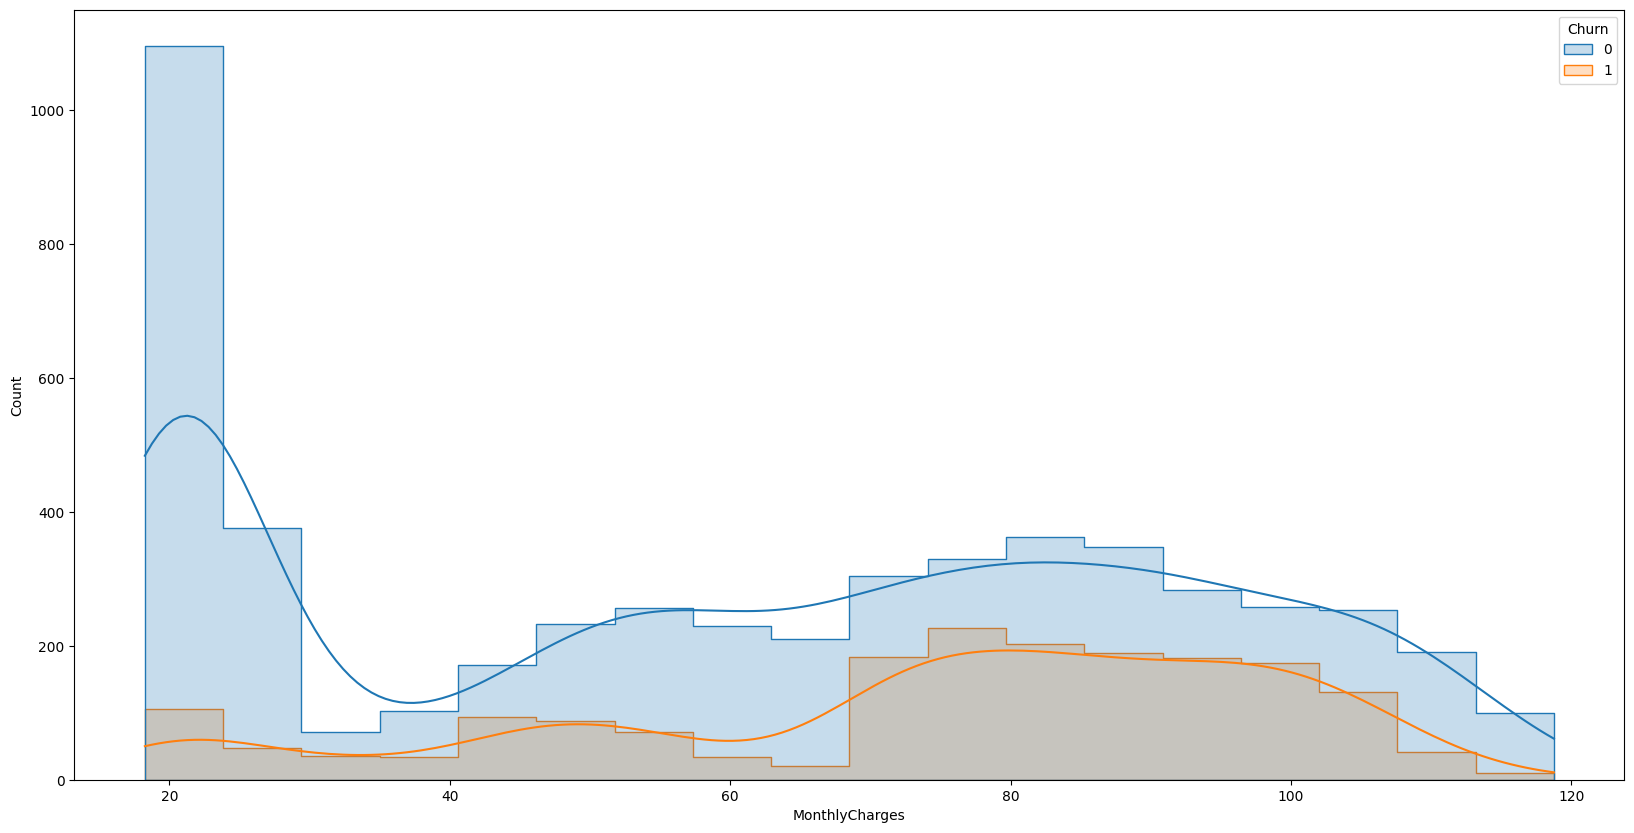

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols={'tenure','MonthlyCharges'}
for i in num_cols:
    plt.figure(figsize=(20,10))
    sns.histplot(data=df, x=i, hue='Churn', kde=True, element='step')
    plt.show()

In [13]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
num_cols = ["tenure", 'MonthlyCharges']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])   

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[945  91]
 [208 165]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.44      0.52       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.79      0.77      1409

Accuracy: 0.7877927608232789


In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
rfc.fit(X_res, y_res)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[847 189]
 [140 233]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1036
           1       0.55      0.62      0.59       373

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409

Accuracy: 0.7665010645848119


In [19]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000,class_weight='balanced')
logmodel.fit(X_res, y_res)
y_pred = logmodel.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[808 228]
 [ 90 283]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1036
           1       0.55      0.76      0.64       373

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409

Accuracy: 0.7743080198722498


In [20]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',scale_pos_weight=1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[921 115]
 [187 186]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.62      0.50      0.55       373

    accuracy                           0.79      1409
   macro avg       0.72      0.69      0.71      1409
weighted avg       0.77      0.79      0.78      1409

Accuracy: 0.7856635911994322


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:36:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [21]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42,is_unbalance=True)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
[[787 249]
 [ 80 293]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1036
           1       0.54      0.79      0.64       373

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409

Accuracy: 0.7665

In [22]:
y_probs = logmodel.predict_proba(X_test)[:,1]  # probability for class 1
threshold = 0.6
y_pred_new = (y_probs >= threshold).astype(int)
print(confusion_matrix(y_test, y_pred_new))
print(classification_report(y_test, y_pred_new))

[[871 165]
 [115 258]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1036
           1       0.61      0.69      0.65       373

    accuracy                           0.80      1409
   macro avg       0.75      0.77      0.75      1409
weighted avg       0.81      0.80      0.81      1409



In [23]:
from sklearn.metrics import f1_score
import numpy as np

# Get predicted probabilities for class 1
y_probs = lgbm.predict_proba(X_test)[:, 1]

# Try thresholds from 0.1 to 0.9
thresholds = np.arange(0.1, 0.91, 0.01)
f1_scores = []

for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))

# Find threshold with maximum F1-score
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best threshold: {best_threshold:.2f}")
print(f"Best F1-score: {best_f1:.3f}")

# Predict using the optimal threshold
y_pred_best = (y_probs >= best_threshold).astype(int)

# Print final evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))


Best threshold: 0.51
Best F1-score: 0.643
[[795 241]
 [ 82 291]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1036
           1       0.55      0.78      0.64       373

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409

Accuracy: 0.7707594038325053


**Fine-Tuning**

In [24]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

lgbm = LGBMClassifier(is_unbalance=True, random_state=42)
grid = GridSearchCV(lgbm, param_grid, scoring='f1', cv=5, n_jobs=1)
grid.fit(X_res, y_res)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
# lgbm

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3310, number of negative: 3310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 6620, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po